# scikit-learn Pipeline Interoperability

Because scikit-stan models all adhere to the scikit-learn API, they can be combined with methods from scikit-learn to form pipelines of operations. As such, scikit-stan can make use of the wide range of model operations provided by scikit-learn. Here, we show simple examples of incorporating scikit-stan models in pipelines with methods and other models from scikit-learn.

In [1]:
from scikit_stan import GLM

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

c:\Users\alizm\anaconda3\envs\intern\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
mpl.rc('axes.spines', top=True, bottom=True, left=True, right=True)
#mpl.rc('axes', facecolor='white')
mpl.rc("xtick", bottom=True, labelbottom=True)
mpl.rc("ytick", left=True, labelleft=True)
mpl.style.use('ggplot')


# center images
from IPython.core.display import HTML
HTML("""
<style>
.jp-RenderedImage, .output_png{
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [14]:
X, y, true_weights = datasets.make_regression(
    n_samples=100,
    n_features=75,
    n_informative=10,
    noise=8,
    coef=True,
    random_state=42,
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


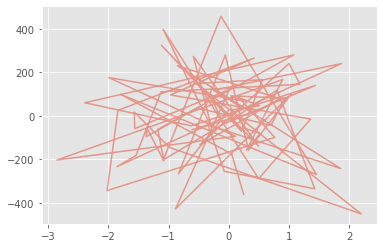

In [15]:
plt.plot(X_train[0], y_train, alpha=0.5)

In [3]:
pipe = Pipeline([('scaler', StandardScaler()), ('glm', GLM( seed=1234))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

c:\users\alizm\documents\flatironinstitute\scikit-stan\scikit_stan\generalized_linear_regression\glm.py:406: UserWarning: 
                    Link function not specified. Using default link function 'identity'
                    for family 'gaussian'.
                
  """
c:\users\alizm\documents\flatironinstitute\scikit-stan\scikit_stan\generalized_linear_regression\glm.py:500: UserWarning: Prior on intercept not specified. Using default prior.
                alpha ~ normal(mu(y), 2.5 * sd(y)) if Gaussian family else normal(0, 2.5)
  alpha ~ normal(mu(y), 2.5 * sd(y)) if Gaussian family else normal(0, 2.5)"""
c:\users\alizm\documents\flatironinstitute\scikit-stan\scikit_stan\generalized_linear_regression\glm.py:546: UserWarning: Prior on auxiliary parameter not specified. Using default unscaled prior
                        sigma ~ exponential(1)
                    
  """
16:26:34 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉     


16:26:35 - cmdstanpy - INFO - CmdStan done processing.


16:26:36 - cmdstanpy - INFO - Chain [1] start processing
16:26:36 - cmdstanpy - INFO - Chain [2] start processing
16:26:36 - cmdstanpy - INFO - Chain [3] start processing
16:26:36 - cmdstanpy - INFO - Chain [4] start processing
16:26:37 - cmdstanpy - INFO - Chain [1] done processing
16:26:37 - cmdstanpy - INFO - Chain [3] done processing
16:26:37 - cmdstanpy - INFO - Chain [2] done processing
16:26:37 - cmdstanpy - INFO - Chain [4] done processing


0.9911734663273118

In [4]:
glm_unscaled = GLM(seed=1234) 
glm_unscaled.fit(X_train, y_train)
glm_unscaled.score(X_test, y_test)

c:\users\alizm\documents\flatironinstitute\scikit-stan\scikit_stan\generalized_linear_regression\glm.py:406: UserWarning: 
                    Link function not specified. Using default link function 'identity'
                    for family 'gaussian'.
                
  """
c:\users\alizm\documents\flatironinstitute\scikit-stan\scikit_stan\generalized_linear_regression\glm.py:500: UserWarning: Prior on intercept not specified. Using default prior.
                alpha ~ normal(mu(y), 2.5 * sd(y)) if Gaussian family else normal(0, 2.5)
  alpha ~ normal(mu(y), 2.5 * sd(y)) if Gaussian family else normal(0, 2.5)"""
c:\users\alizm\documents\flatironinstitute\scikit-stan\scikit_stan\generalized_linear_regression\glm.py:546: UserWarning: Prior on auxiliary parameter not specified. Using default unscaled prior
                        sigma ~ exponential(1)
                    
  """
16:26:41 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉     


16:26:43 - cmdstanpy - INFO - CmdStan done processing.


16:26:44 - cmdstanpy - INFO - Chain [1] start processing
16:26:44 - cmdstanpy - INFO - Chain [2] start processing
16:26:44 - cmdstanpy - INFO - Chain [3] start processing
16:26:44 - cmdstanpy - INFO - Chain [4] start processing
16:26:45 - cmdstanpy - INFO - Chain [3] done processing
16:26:45 - cmdstanpy - INFO - Chain [1] done processing
16:26:45 - cmdstanpy - INFO - Chain [2] done processing
16:26:45 - cmdstanpy - INFO - Chain [4] done processing


0.9899535381342051

In [22]:
from sklearn import preprocessing
pca = PCA()
scaler = StandardScaler()
mmscaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
logisticregression = GLM(algorithm="optimize", family="bernoulli", link="logit", seed=1234, )

pipeline = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('mmscaler', mmscaler), ('logistic', logisticregression)])

In [21]:
x_digits, y_digits = datasets.load_digits(return_X_y=True)
scaler.fit_transform(x_digits)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 2. ... 8. 9. 8.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [20]:


param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    #"logistic__C": np.logspace(-4, 4, 4), # this should be a specific parameter of the GLM! 
}
searchgrid = GridSearchCV(pipeline, param_grid, n_jobs=2)
searchgrid.fit(x_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % searchgrid.best_score_)
print(searchgrid.best_params_)
pca.fit(x_digits)

c:\Users\alizm\anaconda3\envs\intern\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alizm\anaconda3\envs\intern\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alizm\anaconda3\envs\intern\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\alizm\documents\flatironinstitute\scikit-stan\scikit_stan\generalized_linear_regression\glm.py", line 587, 


16:17:46 - cmdstanpy - INFO - CmdStan done processing.


RuntimeError: Error during sampling:
Exception: glm_v_discrete_model_namespace::glm_v_discrete_model: y[3] is 2, but must be less than or equal to 1.000000 (in 'c:/users/alizm/documents/flatironinstitute/scikit-stan/scikit_stan/stan_files/glm_v_discrete.stan', line 11, column 4 to column 59)
Exception: glm_v_discrete_model_namespace::glm_v_discrete_model: y[3] is 2, but must be less than or equal to 1.000000 (in 'c:/users/alizm/documents/flatironinstitute/scikit-stan/scikit_stan/stan_files/glm_v_discrete.stan', line 11, column 4 to column 59)
Exception: glm_v_discrete_model_namespace::glm_v_discrete_model: y[3] is 2, but must be less than or equal to 1.000000 (in 'c:/users/alizm/documents/flatironinstitute/scikit-stan/scikit_stan/stan_files/glm_v_discrete.stan', line 11, column 4 to column 59)
Exception: glm_v_discrete_model_namespace::glm_v_discrete_model: y[3] is 2, but must be less than or equal to 1.000000 (in 'c:/users/alizm/documents/flatironinstitute/scikit-stan/scikit_stan/stan_files/glm_v_discrete.stan', line 11, column 4 to column 59)
Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['c:\\users\\alizm\\documents\\flatironinstitute\\scikit-stan\\scikit_stan\\stan_files\\glm_v_discrete.exe', 'id=1', 'random', 'seed=1234', 'data', 'file=C:\\Users\\alizm\\AppData\\Local\\Temp\\tmph11f5hgb\\j0w5_468.json', 'output', 'file=C:\\Users\\alizm\\AppData\\Local\\Temp\\tmph11f5hgb\\glm_v_discrete0x8o61g6\\glm_v_discrete-20220809161746_1.csv', 'sig_figs=9', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	C:\Users\alizm\AppData\Local\Temp\tmph11f5hgb\glm_v_discrete0x8o61g6\glm_v_discrete-20220809161746_1.csv
 console_msgs (if any):
	C:\Users\alizm\AppData\Local\Temp\tmph11f5hgb\glm_v_discrete0x8o61g6\glm_v_discrete-20220809161746_0-stdout.txt
Consider re-running with show_console=True if the above output is unclear!